In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
### 1.Découverte des données :

In [ ]:
df = pd.read_csv('dataset.csv', index_col=0)

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.info()

In [6]:
print("Le dataset comporte {} samples et {} variables.".format(df.shape[0], df.shape[1]))

Le dataset comporte 378661 samples et 14 variables.


In [7]:
df_col = df.columns.tolist()
df_col

['name',
 'category',
 'main_category',
 'currency',
 'deadline',
 'goal',
 'launched',
 'pledged',
 'state',
 'backers',
 'country',
 'usd pledged',
 'usd_pledged_real',
 'usd_goal_real']

In [8]:
df.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [ ]:
### 2. Données manquantes et dupliquées :

In [10]:
df.isna().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [11]:
df.duplicated().sum()

0

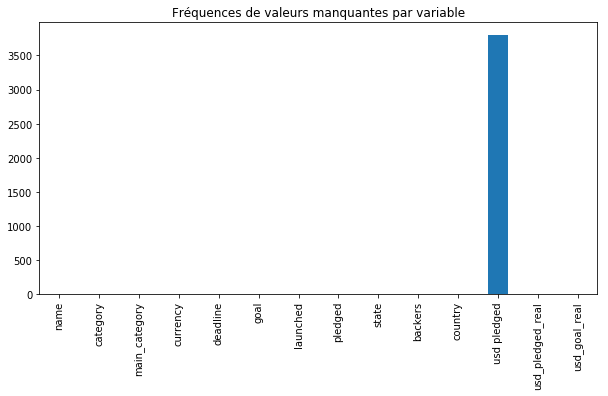

In [12]:
df.isna().sum().plot.bar(
    title='Fréquences de valeurs manquantes par variable',
    figsize=(10,5))

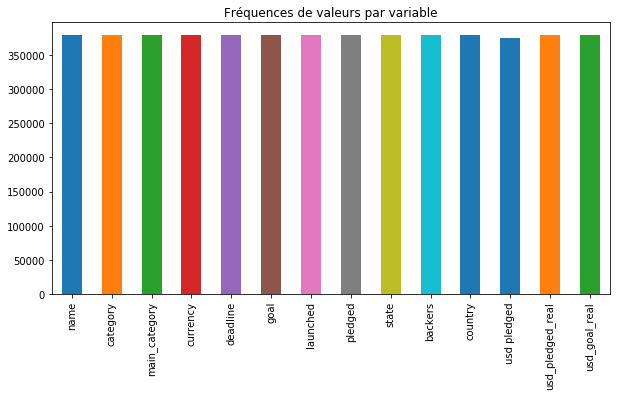

In [13]:
df.count().plot.bar(
    title='Fréquences de valeurs par variable',
    figsize=(10,5))

In [14]:
up_pc = df['usd pledged'].count() / len(df) * 100.
up_pc

98.99725612091027

In [ ]:
### 3. Outliers :

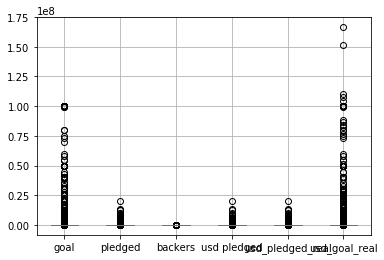

In [27]:
df.boxplot(['goal',

 'pledged',
 
 'backers',
            
'usd pledged',
            
 'usd_pledged_real',
            
 'usd_goal_real'
])

In [ ]:
==> ceci nous permet de verifier s'il y à existence de  valeurs aberrantes.

In [ ]:
### 4. Analyse univariée :


Text(0.5,1,'Fréquences des différents états')

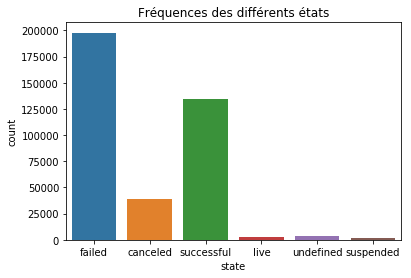

In [20]:
sns.countplot(df['state']).set_title('Fréquences des différents états')

In [ ]:
==> le nombres de projet " succes" & " canceled" & "failed" . les projets failed etant les plus nombreux .
il y à pas mal de  projets sucess egalemnt 

les differentes categories :   15


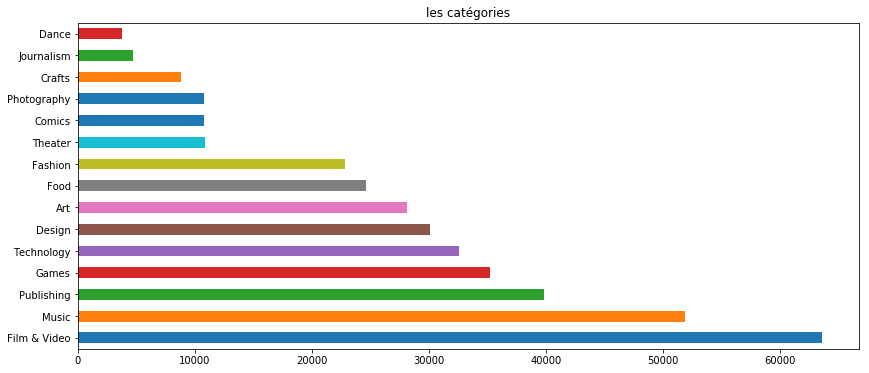

In [29]:
print('les differentes categories :  ', df['main_category'].nunique())
df['main_category'].value_counts().plot(kind='barh', 
                                        figsize=(14,6), 
                                        title='les catégories')

In [ ]:
==> les differentes catégories de projets . la categorie film & video etant la plus importante .

C:\Users\mkmyr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'success')

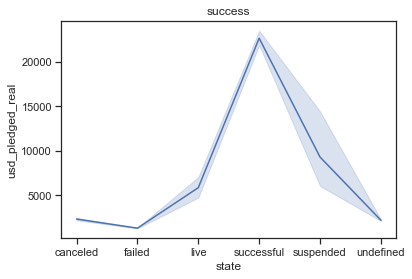

In [57]:
sns.lineplot(x='state', y='usd_pledged_real', data=df)
plt.title('success')

In [ ]:
==> un projet a plus de chance d'etre reussi lorqu'il y à un reel engagement 

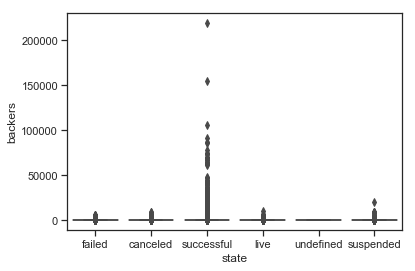

In [58]:
sns.boxplot(x='state' ,y='backers', data=df)

In [ ]:
==>  ==> la mise en valeur des projets " sucess" en fonction du nombre des backers : c'est à dire que plus le nombre de backers est elevé,
    plus la reussite est garantie 

In [ ]:
df['goal'].skew()

In [ ]:
### 5. Analyse multivariée : 

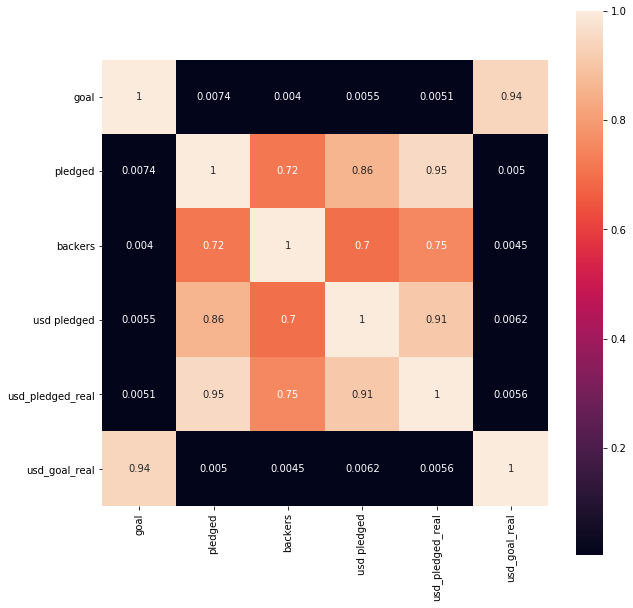

In [22]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, square=True)

In [ ]:
==> on remarque une forte correlation entre "usd pledged" et" usd pledged real" ainsi que "les goal" , "le pledged" et" les backers" notament .

In [ ]:
### conclusion :
Nous avons chercher les enjeux menant à la reussite ou à l'echec d'un projet en etudiant plusieurs facteurs  .
Et nous avons conclu que la categorie principale du projet et le montant de son objectif , avaient un impact sur
le succès d’un projet ou son echec .